Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

In [2]:
# name and files for the simulation studied LPT - no GM1

name = '_DPPC_DIPC_chol_352'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/sans_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/5_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - 10% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/10_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [3]:
u = mda.Universe( path+fgro, path+fxtc)

In [4]:
sel_all = u.select_atoms("all and (name PO4 or name GM5)")

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [6]:
print(u.trajectory.n_frames)

10000


In [7]:
# TAKE THE LAST FRAME
frame = 8100
u.trajectory[frame]

< Timestep 8100 with unit cell dimensions [417.03152 417.03152 166.93027  90.       90.       90.     ] >

In [8]:
# set the x and y min and max values

sel_all = "all and (name PO4 or name GM5)"
patch = u.select_atoms(sel_all).positions
print(patch)

xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[289.55002  279.61002   59.04    ]
 [ 71.090004 321.93      52.700005]
 [108.94     219.06      56.860004]
 ...
 [244.36002   97.59001   27.410002]
 [122.380005  56.530003  17.25    ]
 [ 90.76     244.44      14.710001]]
417.01
417.0
0.0
0.060000002


In [13]:
np.set_printoptions(threshold=np.inf)
print(patch[:,0])

[2.89550018e+02 7.10900040e+01 1.08940002e+02 8.68899994e+01
 3.90960022e+02 2.28930023e+02 8.55899963e+01 3.80000025e-01
 3.37080017e+02 3.78890015e+02 1.33010010e+02 2.42490005e+02
 3.74050018e+02 1.91399994e+01 8.09199982e+01 1.92000008e+00
 2.75870026e+02 5.79100037e+01 1.24530014e+02 1.10180008e+02
 2.77250000e+02 1.77030014e+02 4.45299988e+01 3.54270020e+02
 1.94950012e+02 4.72900009e+01 2.50860001e+02 1.22970009e+02
 7.51500015e+01 3.05110016e+02 2.99750031e+02 3.49239990e+02
 1.15590012e+02 3.75180023e+02 4.54500008e+01 3.78110016e+02
 9.93700027e+01 3.97800026e+01 2.90320007e+02 1.73240021e+02
 3.00070007e+02 4.01840027e+02 4.81200027e+01 1.72260010e+02
 2.94770020e+02 2.66000009e+00 3.28600006e+02 3.23630035e+02
 2.23060013e+02 5.89400024e+01 3.27730042e+02 2.86160004e+02
 3.33350037e+02 3.40119995e+02 7.55400009e+01 4.37500000e+01
 3.57770020e+02 1.99590012e+02 3.63630035e+02 3.15360016e+02
 5.70800018e+01 1.85000019e+01 1.44980011e+02 3.29099998e+01
 1.84880005e+02 2.454800

In [111]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 4840
number of lipids in the upper leaflet: 2420 + number of lipids in the lower leaflet:2420 
= 4840


In [112]:
# TAKE THE LAST FRAME

u.trajectory[frame]

< Timestep 8100 with unit cell dimensions [417.03152 417.03152 166.93027  90.       90.       90.     ] >

In [113]:
sel_Lo = "all and (name PO4 and resname DPPC)"
M_Lo = leaflet1.select_atoms(sel_Lo).positions
for i in range(len(M_Lo)):
    M_Lo[i,2] = 1

sel_Ld = "all and (name PO4 and resname DIPC)"
M_Ld = leaflet1.select_atoms(sel_Ld).positions
for i in range(len(M_Ld)):
    M_Ld[i,2] = 0
    
M_coords = np.concatenate((M_Lo, M_Ld), axis = 0)
print(M_coords)

[[156.30002  374.95       1.      ]
 [184.08002  134.04001    1.      ]
 [264.03003   40.030003   1.      ]
 ...
 [ 31.320002  55.600006   0.      ]
 [105.020004  83.47       0.      ]
 [371.75003  329.62003    0.      ]]


In [114]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N
print(dx)
print(dy)

27.800667317708335
27.796000162760418


(225, 3)


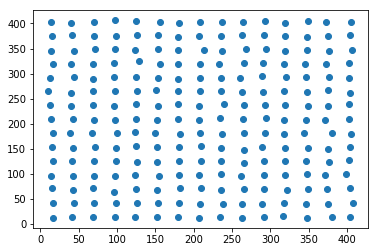

In [115]:
# leaflet 1
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1_Lo = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b1=leaflet1.select_atoms(sel).centroid().tolist()
        bary1.append(b1)
        
        # composition rates in each box
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1PC= leaflet1.select_atoms(sel_totPC).positions
        n_tot1PC=len(tot1PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo1= leaflet1.select_atoms(sel_Lo).positions
        n_Lo1=len(Lo1) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_1= leaflet1.select_atoms(sel_GM1).positions
        n_GM1_1=len(GM1_1) # number of GM1 molecules
        
        
        if  n_tot1PC!=0:
            phi1_Lo=n_Lo1/n_tot1PC
        else :
            print('leaflet 1, empty box: i=%d and j=%d' % (i,j))
        
        Mphi1_Lo[i,j]=phi1_Lo
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))

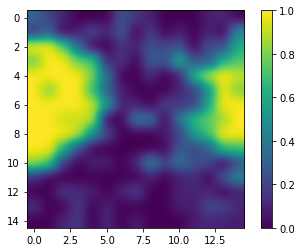

In [116]:
# DPPC / (DPPC+DIPC) leaflet 1
plt.imshow(Mphi1_Lo, interpolation='gaussian')
plt.colorbar()

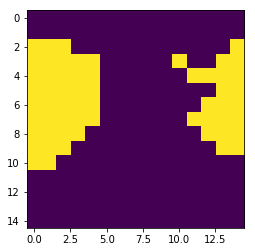

In [117]:
# lower leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi1_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_Lo[i,j]>= threshold :
            Mphi1_bin[i,j]=1

#print(Mphi1_bin)          

plt.imshow(Mphi1_bin)

In [118]:
print(Mphi1_bin)
print(np.shape(Mphi1_bin))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(15, 15)


In [119]:
M_sum = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        M_sum[i,j] = sum(Mphi1_bin[i,:])+sum(Mphi1_bin[:,j])
print(M_sum)

[[ 9.  9.  8.  6.  5.  0.  0.  0.  0.  0.  1.  2.  4.  7.  8.]
 [ 9.  9.  8.  6.  5.  0.  0.  0.  0.  0.  1.  2.  4.  7.  8.]
 [13. 13. 12. 10.  9.  4.  4.  4.  4.  4.  5.  6.  8. 11. 12.]
 [17. 17. 16. 14. 13.  8.  8.  8.  8.  8.  9. 10. 12. 15. 16.]
 [18. 18. 17. 15. 14.  9.  9.  9.  9.  9. 10. 11. 13. 16. 17.]
 [16. 16. 15. 13. 12.  7.  7.  7.  7.  7.  8.  9. 11. 14. 15.]
 [17. 17. 16. 14. 13.  8.  8.  8.  8.  8.  9. 10. 12. 15. 16.]
 [18. 18. 17. 15. 14.  9.  9.  9.  9.  9. 10. 11. 13. 16. 17.]
 [16. 16. 15. 13. 12.  7.  7.  7.  7.  7.  8.  9. 11. 14. 15.]
 [14. 14. 13. 11. 10.  5.  5.  5.  5.  5.  6.  7.  9. 12. 13.]
 [11. 11. 10.  8.  7.  2.  2.  2.  2.  2.  3.  4.  6.  9. 10.]
 [ 9.  9.  8.  6.  5.  0.  0.  0.  0.  0.  1.  2.  4.  7.  8.]
 [ 9.  9.  8.  6.  5.  0.  0.  0.  0.  0.  1.  2.  4.  7.  8.]
 [ 9.  9.  8.  6.  5.  0.  0.  0.  0.  0.  1.  2.  4.  7.  8.]
 [ 9.  9.  8.  6.  5.  0.  0.  0.  0.  0.  1.  2.  4.  7.  8.]]


In [120]:
val_max = 0
x_big = 0
y_big = 0
for i in range(N):
    for j in range(N):
        if M_sum[i,j]>val_max:
            val_max = M_sum[i,j]
            x_big = i
            y_big = j
print(x_big)
print(y_big)
print(val_max)

4
0
18.0


In [121]:
def modulo(x,a,b):
    if x < a:
        x = x + (b-a)
    elif x >= b:
        x = x - (b-a)
    return x

In [122]:
x_center_b = 7
y_center_b = 7

vec_cor_b = np.zeros((1,2))

-3
-7
[[-3. -7.]]


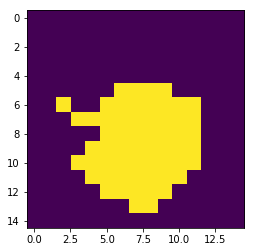

In [123]:
x_cor = x_big - x_center_b
y_cor = y_big - y_center_b
print(x_cor)
print(y_cor)
M_full = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_bin[i,j]==1:
            M_full[ modulo(i-x_cor,0,N), modulo(j-y_cor,0,N) ] = Mphi1_bin[i,j]
            
plt.imshow(M_full)

vec_cor_b[0,0] = vec_cor_b[0,0] + x_cor
vec_cor_b[0,1] = vec_cor_b[0,1] + y_cor
print(vec_cor_b)

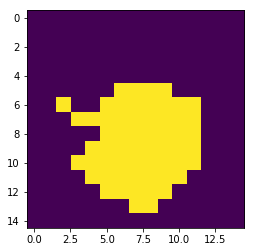

In [124]:
for i in range(N):
    for j in range(N):
        if (M_full[modulo(i-1,0,N),modulo(j-1,0,N)]==0 and M_full[modulo(i-1,0,N),j]==0 and M_full[modulo(i-1,0,N),modulo(j+1,0,N)]==0 and M_full[i,modulo(j-1,0,N)]==0 and M_full[i,modulo(j+1,0,N)]==0 and M_full[modulo(i+1,0,N),modulo(j-1,0,N)]==0 and M_full[modulo(i+1,0,N),j]==0 and M_full[modulo(i+1,0,N),modulo(j+1,0,N)]==0):
            M_full[i,j] = 0
plt.imshow(M_full)

In [125]:
# for M_full

nb_Lo = int(np.sum(M_full))
print(nb_Lo)

coords_Lo = np.zeros((nb_Lo,2))
l = 0

for i in range(N):
    for j in range(N):
        if M_full[i,j] == 1 :
            coords_Lo[l][0] = i
            coords_Lo[l][1] = j
            l += 1

box_x_mean = np.mean(coords_Lo[:,0])
box_y_mean = np.mean(coords_Lo[:,1])
print(box_x_mean)
print(box_y_mean)

box_x_max = 0
box_y_max = 0

for i in range(N):
    for j in range(N):
        if M_full[i,j]==1 and np.abs(i-box_x_mean) > box_x_max:
            box_x_max = np.abs(i-box_x_mean)
        if M_full[i,j]==1 and np.abs(j-box_y_mean) > box_y_max:
            box_y_max = np.abs(j-box_y_mean)
print(box_x_max)
print(box_y_max)
box_max = np.ceil(max(box_x_max,box_y_max))
print(box_max)

59
8.677966101694915
7.271186440677966
4.322033898305085
5.271186440677966
6.0


(1.540143369175627, 11.45985663082437, -13.4151766004415, -4.584823399558499)

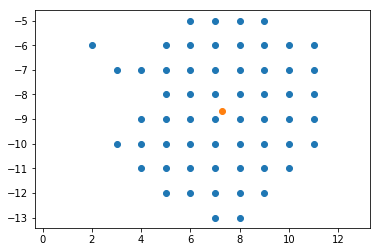

In [126]:
plt.scatter(coords_Lo[:,1], -coords_Lo[:,0])
plt.scatter(box_y_mean, -box_x_mean)
plt.axis('equal')

In [127]:
x_mean_b = int(round(box_x_mean))
print(x_mean_b)
y_mean_b = int(round(box_y_mean))
print(y_mean_b)

9
7


2
0
[[-1. -7.]]


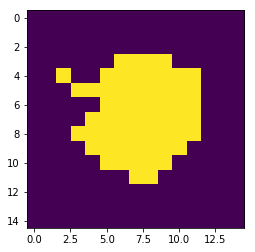

In [128]:
x_cor = x_mean_b - x_center_b
y_cor = y_mean_b - y_center_b
print(x_cor)
print(y_cor)
M_center = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if M_full[i,j]==1:
            M_center[ modulo(i-x_cor,0,N), modulo(j-y_cor,0,N) ] = M_full[i,j]
            
plt.imshow(M_center)

vec_cor_b[0,0] = vec_cor_b[0,0] + x_cor
vec_cor_b[0,1] = vec_cor_b[0,1] + y_cor
print(vec_cor_b)

In [129]:
x_center = (xmin+xmax)/2
y_center = (ymin+ymax)/2
#r_max = box_max /N * (ymax-ymin) *1.1

r_max = np.floor((xmax-xmin)/2)*0.9

vec_cor = vec_cor_b /N * (ymax-ymin)

print(x_center)
print(y_center)
print(r_max)
print(vec_cor)

208.5050048828125
208.52999877929688
187.20000000000002
[[ -27.79600016 -194.57200114]]


In [130]:
for i in range(len(M_coords)):
    print(M_coords[i]) 

[156.30002 374.95      1.     ]
[184.08002 134.04001   1.     ]
[264.03003   40.030003   1.      ]
[186.82 391.24   1.  ]
[211.19002 239.36002   1.     ]
[201.74002  91.16      1.     ]
[292.11002   27.270002   1.      ]
[179.57 123.47   1.  ]
[290.01    307.86002   1.     ]
[115.12 331.24   1.  ]
[398.6   89.47   1.  ]
[107.850006 413.95       1.      ]
[111.990005 399.45004    1.      ]
[61.61       5.2400007  1.       ]
[ 31.920002 400.37003    1.      ]
[170.58    106.34001   1.     ]
[ 43.13    242.12003   1.     ]
[127.83001  57.61      1.     ]
[245.77002 379.68002   1.     ]
[125.23001 166.71002   1.     ]
[105.69    293.83002   1.     ]
[139.96    349.32004   1.     ]
[177.63      87.130005   1.      ]
[262.03 358.79   1.  ]
[193.01001 124.27001   1.     ]
[143.40001 154.32      1.     ]
[269.4   11.13   1.  ]
[223.75002 143.06001   1.     ]
[92.40001  17.460001  1.      ]
[217.89001 341.37      1.     ]
[187.76001 404.60004   1.     ]
[ 40.57    131.62001   1.     ]
[181.35  

[381.44 298.44   1.  ]
[ 51.08    404.45004   1.     ]
[126.020004 386.69003    1.      ]
[224.71    367.27002   1.     ]
[296.09003   21.720001   1.      ]
[191.81001   60.050003   1.      ]
[291.73      44.230003   1.      ]
[188.49  45.38   1.  ]
[121.41    403.78003   1.     ]
[228.01001   8.56      1.     ]
[245.44    403.91003   1.     ]
[198.19 222.66   1.  ]
[53.440002 29.850002  1.      ]
[165.24  90.62   1.  ]
[182.13    390.79004   1.     ]
[171.97  32.29   1.  ]
[304.08002  20.35      1.     ]
[191.69      87.130005   1.      ]
[256.79      28.980003   1.      ]
[ 88.850006 234.66002    1.      ]
[191.30002  74.16      1.     ]
[189.33    102.89001   1.     ]
[100.57    416.02002   1.     ]
[130.35 109.2    1.  ]
[257.33002   44.820004   1.      ]
[ 76.770004 364.86       1.      ]
[191.44    147.51001   1.     ]
[127.88001  22.17      1.     ]
[278.      328.24002   1.     ]
[165.69  38.29   1.  ]
[23.260002   3.6000001  1.       ]
[289.07    237.78001   1.     ]
[116.87  

[ 73.340004 329.61002    0.      ]
[ 15.31 191.24   0.  ]
[94.100006 84.560005  0.      ]
[205.03 174.32   0.  ]
[121.72001 268.53      0.     ]
[132.66    276.91003   0.     ]
[271.72 119.06   0.  ]
[415.98004 325.84003   0.     ]
[373.17 107.29   0.  ]
[318.      380.96002   0.     ]
[ 64.69 142.32   0.  ]
[134.51001 197.12003   0.     ]
[127.55001 188.72002   0.     ]
[378.02002 113.42001   0.     ]
[ 29.890001 255.53001    0.      ]
[372.36    390.27002   0.     ]
[274.88    124.69001   0.     ]
[  9.5     270.77002   0.     ]
[332.72003 232.58002   0.     ]
[360.64        3.1100001   0.       ]
[157.54001 297.15002   0.     ]
[411.12003 310.91      0.     ]
[357.05002 230.89001   0.     ]
[ 5.23    87.14001  0.     ]
[389.29 245.27   0.  ]
[231.67001 254.02      0.     ]
[  3.63    301.05002   0.     ]
[ 40.620003 320.71002    0.      ]
[ 57.870003 213.27002    0.      ]
[374.42 258.63   0.  ]
[ 63.420006 382.51004    0.      ]
[274.90002 337.15      0.     ]
[348.37003  117.42000

[14.47     53.310005  0.      ]
[303.77002 120.87001   0.     ]
[20.39 88.    0.  ]
[373.56003  32.22      0.     ]
[358.68 346.57   0.  ]
[378.1     304.02002   0.     ]
[296.85    132.83002   0.     ]
[ 12.12 315.44   0.  ]
[ 70.58    200.09001   0.     ]
[123.82001 193.47      0.     ]
[189.04001 236.75002   0.     ]
[318.47003  27.95      0.     ]
[ 74.04    152.08002   0.     ]
[379.98  91.94   0.  ]
[111.22001 288.86002   0.     ]
[191.42    181.15002   0.     ]
[178.1     287.08002   0.     ]
[244.72002 248.01001   0.     ]
[ 38.030003 331.49002    0.      ]
[ 89.06    386.77002   0.     ]
[144.72002  41.65      0.     ]
[ 31.01    237.79001   0.     ]
[ 40.610004 215.65001    0.      ]
[  8.030001 181.62001    0.      ]
[ 58.950005 399.98       0.      ]
[410.17 373.6    0.  ]
[ 91.21001 254.93002   0.     ]
[254.08002 132.49      0.     ]
[210.91002 141.18001   0.     ]
[355.27002 246.65001   0.     ]
[ 45.65    162.92001   0.     ]
[256.95 168.08   0.  ]
[294.81  95.15   0.  

[345.73    110.11001   0.     ]
[  3.03 294.89   0.  ]
[ 38.07 311.5    0.  ]
[368.38 283.     0.  ]
[ 54.960003 334.84003    0.      ]
[134.82    137.70001   0.     ]
[380.25    188.24002   0.     ]
[319.52002     3.8600001   0.       ]
[282.78003 376.02002   0.     ]
[153.93001 278.13      0.     ]
[ 16.130001 231.92001    0.      ]
[240.96 207.88   0.  ]
[348.36002 258.19003   0.     ]
[331.56003  107.270004   0.      ]
[104.170006 192.08       0.      ]
[242.71002 302.44      0.     ]
[304.30002 360.33002   0.     ]
[ 42.5     148.93001   0.     ]
[181.68001 224.41002   0.     ]
[ 26.560001 170.25002    0.      ]
[166.26001 134.41      0.     ]
[265.74002 249.21002   0.     ]
[343.23 134.32   0.  ]
[392.41    374.21002   0.     ]
[ 18.160002 109.26001    0.      ]
[214.14001 246.21      0.     ]
[407.91    240.70001   0.     ]
[359.80005 181.03      0.     ]
[380.39 268.32   0.  ]
[394.26 332.57   0.  ]
[102.240005 215.95001    0.      ]
[413.77002 329.66003   0.     ]
[234.54001 1

In [131]:
for i in range(len(M_coords)):
    M_coords[i,0] = modulo(M_coords[i,0] - vec_cor[0,0],xmin,xmax)
    M_coords[i,1] = modulo(M_coords[i,1] - vec_cor[0,1],ymin,ymax)

In [132]:
print(M_coords)

[[184.09602 152.58202   1.     ]
 [211.87602 328.612     1.     ]
 [291.82602 234.602     1.     ]
 ...
 [ 59.116   250.17201   0.     ]
 [132.81601 278.042     0.     ]
 [399.54602 107.25202   0.     ]]


In [133]:
nb_r = 8
dr = int(r_max/nb_r)

nb_theta = 20
dtheta = 2*np.pi/nb_theta

print(dr)
print(dtheta)

23
0.3141592653589793


In [134]:
# Condition à voir

if r_max < np.floor((xmax-xmin)/2)+dr:
    print('OK')
else:
    print('too big')

OK


In [135]:
# leaflet 1
# divide the leaflet into a pie

x = M_coords[:,0]
y = M_coords[:,1]

x_pie_r = [[] for r in range(nb_r)]
y_pie_r = [[] for r in range(nb_r)]
pie_r = [[] for r in range(nb_r)]

x_pie_theta = [[] for t in range(nb_theta)]
y_pie_theta = [[] for t in range(nb_theta)]
pie_theta = [[] for t in range(nb_theta)]

r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M_coords)):
        xi = M_coords[i,0]
        yi = M_coords[i,1]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)
        
    x_pie_r[r] = x_r
    y_pie_r[r] = y_r
    pie_r[r] = i_r
    
for i in range(len(M_coords)):
    xi = M_coords[i,0]
    yi = M_coords[i,1]
    
    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1
    
    x_pie_theta[t].append(xi)
    y_pie_theta[t].append(yi)
    pie_theta[t].append(i)

(-20.772858647592233,
 437.70487565357223,
 -21.040155363629754,
 444.2238227765332)

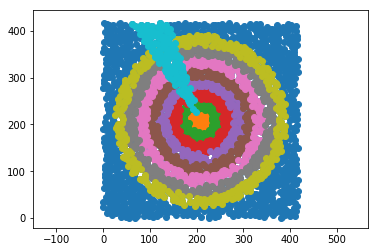

In [136]:
plt.scatter(x,y)

for r in range(nb_r):
    plt.scatter(x_pie_r[r], y_pie_r[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=6;    
plt.scatter(x_pie_theta[t], y_pie_theta[t])    
plt.axis('equal')

In [137]:
# leaflet 1
# divide the leaflet into a pie - Lo lipids only

l_Lo = int(np.sum(M_coords[:,2]))
M_coords_Lo = np.zeros((l_Lo,3))

j = 0
for i in range(len(M_coords)):
    if M_coords[i,2] == 1:
        M_coords_Lo[j] = M_coords[i]
        j+=1

x_Lo = M_coords_Lo[:,0]
y_Lo = M_coords_Lo[:,1]

x_pie_r_Lo = [[] for r in range(nb_r)]
y_pie_r_Lo = [[] for r in range(nb_r)]
pie_r_Lo = [[] for r in range(nb_r)]

x_pie_theta_Lo = [[] for t in range(nb_theta)]
y_pie_theta_Lo = [[] for t in range(nb_theta)]
pie_theta_Lo = [[] for t in range(nb_theta)]


r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M_coords_Lo)):
        
        xi = M_coords_Lo[i,0]
        yi = M_coords_Lo[i,1]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)

    x_pie_r_Lo[r] = x_r
    y_pie_r_Lo[r] = y_r
    pie_r_Lo[r] = i_r
    
for i in range(len(M_coords_Lo)):
    xi = M_coords_Lo[i,0]
    yi = M_coords_Lo[i,1]

    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1

    x_pie_theta_Lo[t].append(xi)
    y_pie_theta_Lo[t].append(yi)
    pie_theta_Lo[t].append(i)

(-24.65709105887577,
 437.8898391017286,
 -27.462287773820236,
 444.01628353211515)

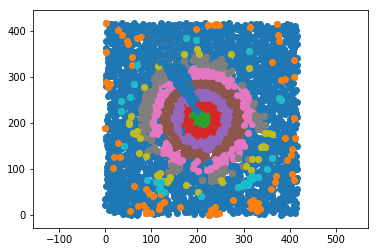

In [139]:
plt.scatter(x,y)
plt.scatter(x_Lo,y_Lo)

for r in range(nb_r):
    plt.scatter(x_pie_r_Lo[r], y_pie_r_Lo[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=6;    
plt.scatter(x_pie_theta_Lo[t], y_pie_theta_Lo[t])    
plt.axis('equal')

In [140]:
pie = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [141]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r[r])):
                if (pie_r[r][l] in pie_theta[t]):
                    pie[r][t].append(pie_r[r][l])
    

In [142]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie[r][t])) )

r=0 t=0 0
r=0 t=1 3
r=0 t=2 1
r=0 t=3 0
r=0 t=4 1
r=0 t=5 1
r=0 t=6 1
r=0 t=7 3
r=0 t=8 2
r=0 t=9 2
r=0 t=10 1
r=0 t=11 3
r=0 t=12 1
r=0 t=13 1
r=0 t=14 1
r=0 t=15 3
r=0 t=16 1
r=0 t=17 1
r=0 t=18 1
r=0 t=19 1
r=1 t=0 5
r=1 t=1 4
r=1 t=2 3
r=1 t=3 5
r=1 t=4 3
r=1 t=5 5
r=1 t=6 2
r=1 t=7 4
r=1 t=8 4
r=1 t=9 2
r=1 t=10 5
r=1 t=11 2
r=1 t=12 3
r=1 t=13 4
r=1 t=14 4
r=1 t=15 5
r=1 t=16 4
r=1 t=17 3
r=1 t=18 5
r=1 t=19 3
r=2 t=0 9
r=2 t=1 7
r=2 t=2 6
r=2 t=3 6
r=2 t=4 8
r=2 t=5 7
r=2 t=6 9
r=2 t=7 7
r=2 t=8 6
r=2 t=9 7
r=2 t=10 7
r=2 t=11 5
r=2 t=12 7
r=2 t=13 7
r=2 t=14 8
r=2 t=15 6
r=2 t=16 8
r=2 t=17 6
r=2 t=18 6
r=2 t=19 6
r=3 t=0 9
r=3 t=1 9
r=3 t=2 9
r=3 t=3 9
r=3 t=4 9
r=3 t=5 10
r=3 t=6 9
r=3 t=7 7
r=3 t=8 10
r=3 t=9 8
r=3 t=10 10
r=3 t=11 6
r=3 t=12 8
r=3 t=13 8
r=3 t=14 9
r=3 t=15 5
r=3 t=16 8
r=3 t=17 9
r=3 t=18 9
r=3 t=19 11
r=4 t=0 10
r=4 t=1 13
r=4 t=2 9
r=4 t=3 12
r=4 t=4 10
r=4 t=5 12
r=4 t=6 11
r=4 t=7 10
r=4 t=8 11
r=4 t=9 9
r=4 t=10 12
r=4 t=11 11
r=4 t=12 12
r=4 t=13 13


In [143]:
pie_Lo = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [144]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r_Lo[r])):
                if (pie_r_Lo[r][l] in pie_theta_Lo[t]):
                    pie_Lo[r][t].append(pie_r_Lo[r][l])
    

In [145]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie_Lo[r][t])) )

r=0 t=0 0
r=0 t=1 3
r=0 t=2 1
r=0 t=3 0
r=0 t=4 1
r=0 t=5 1
r=0 t=6 1
r=0 t=7 3
r=0 t=8 2
r=0 t=9 2
r=0 t=10 1
r=0 t=11 3
r=0 t=12 1
r=0 t=13 1
r=0 t=14 1
r=0 t=15 3
r=0 t=16 1
r=0 t=17 1
r=0 t=18 1
r=0 t=19 1
r=1 t=0 5
r=1 t=1 4
r=1 t=2 3
r=1 t=3 5
r=1 t=4 3
r=1 t=5 5
r=1 t=6 2
r=1 t=7 3
r=1 t=8 3
r=1 t=9 2
r=1 t=10 5
r=1 t=11 1
r=1 t=12 3
r=1 t=13 4
r=1 t=14 4
r=1 t=15 5
r=1 t=16 4
r=1 t=17 3
r=1 t=18 5
r=1 t=19 3
r=2 t=0 9
r=2 t=1 7
r=2 t=2 5
r=2 t=3 6
r=2 t=4 8
r=2 t=5 7
r=2 t=6 9
r=2 t=7 7
r=2 t=8 6
r=2 t=9 7
r=2 t=10 7
r=2 t=11 4
r=2 t=12 6
r=2 t=13 7
r=2 t=14 8
r=2 t=15 6
r=2 t=16 7
r=2 t=17 6
r=2 t=18 6
r=2 t=19 6
r=3 t=0 9
r=3 t=1 9
r=3 t=2 9
r=3 t=3 9
r=3 t=4 8
r=3 t=5 10
r=3 t=6 9
r=3 t=7 7
r=3 t=8 10
r=3 t=9 8
r=3 t=10 8
r=3 t=11 5
r=3 t=12 8
r=3 t=13 7
r=3 t=14 5
r=3 t=15 3
r=3 t=16 7
r=3 t=17 9
r=3 t=18 9
r=3 t=19 11
r=4 t=0 8
r=4 t=1 11
r=4 t=2 5
r=4 t=3 12
r=4 t=4 10
r=4 t=5 12
r=4 t=6 11
r=4 t=7 8
r=4 t=8 11
r=4 t=9 9
r=4 t=10 11
r=4 t=11 2
r=4 t=12 10
r=4 t=13 8
r=4 t

In [147]:
M_pie_bin = np.zeros((nb_r, nb_theta))

for r in range(nb_r):
    for t in range(nb_theta):
        if r==0:
            M_pie_bin[r,t]=1
        elif(len(pie_Lo[r][t])/len(pie[r][t])>=threshold):
            M_pie_bin[r,t]=1
print(M_pie_bin)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [148]:
boundary = [[],[]]

for t in range(nb_theta):
    print(t)
    boundary[0].append(t)
    
    b_found = 0
    for r in range(0,nb_r-2,1):
        
        if M_pie_bin[r,t]==1 and (M_pie_bin[r+1,t]==0 or r+1>=nb_r) and (M_pie_bin[r+2,t]==0 or r+2>=nb_r):
            b_found = 1
            print('ok')
            boundary[1].append(r)
    print('b_found = %d' % b_found)
    if b_found == 0:
        if M_pie_bin[nb_r-2,t]==1 and M_pie_bin[nb_r-1,t]!=1:
            boundary[1].append(nb_r-2)
        elif M_pie_bin[nb_r-1,t]==1:
            boundary[1].append(nb_r-1)
                
theta_l = np.array(boundary[0])
r_theta = np.array(boundary[1])
print(theta_l)
print(r_theta)

0
ok
b_found = 1
1
ok
b_found = 1
2
ok
b_found = 1
3
ok
b_found = 1
4
ok
b_found = 1
5
ok
b_found = 1
6
ok
b_found = 1
7
ok
b_found = 1
8
ok
b_found = 1
9
ok
b_found = 1
10
ok
b_found = 1
11
ok
b_found = 1
12
ok
b_found = 1
13
ok
b_found = 1
14
ok
b_found = 1
15
ok
b_found = 1
16
ok
b_found = 1
17
ok
b_found = 1
18
ok
b_found = 1
19
ok
b_found = 1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[4 4 3 4 5 5 5 5 5 5 4 3 4 5 2 3 5 4 3 3]


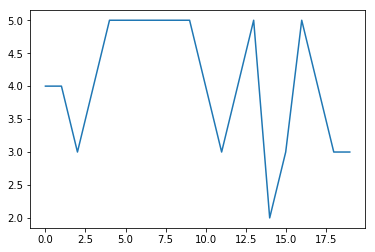

In [149]:
plt.plot(theta_l,r_theta)

In [150]:
r_q = np.fft.rfft(r_theta)
for i in range((len(r_q))):
    print(r_q[i])

(81+0j)
(-3.626627020880103-6.368005784302776j)
(-2.545084971874733+3.302197525465046j)
(-0.18567221970216718+0.3852482574574233j)
(-0.8090169943749448-1.3143277802978368j)
(6-5j)
(3.045084971874738+3.2164408128881385j)
(-2.814327780297835-1.2393502237071061j)
(0.3090169943749501-2.1266270208800995j)
(0.6266270208800995+0.513903818053091j)
(-1+0j)


In [151]:
r_q_pow = abs(r_q)**2
print(r_q_pow)

[6.56100000e+03 5.37039212e+01 1.73819660e+01 1.82890393e-01
 2.38196601e+00 6.10000000e+01 1.96180340e+01 9.45642983e+00
 4.61803399e+00 6.56758558e-01 1.00000000e+00]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


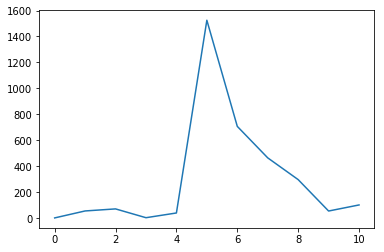

In [152]:
q = np.arange(nb_theta/2+1)
print(q)
plt.plot(r_q_pow*q**2)